In [1]:
# Export pictures to .eps
using Plots
using LinearAlgebra
using DifferentialEquations

In [2]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 2 methods)

In [3]:
## parameter values
θ = 10.0; β = 8/3; μ = 28
time = 50
Δt = 0.001

# initial values
x₀ = -15; y₀ = -17; z₀ = 35
x̄₀ = [x₀;
      y₀;
      z₀]

3-element Vector{Int64}:
 -15
 -17
  35

In [4]:
# Preexisting Julia Solver
prob = ODEProblem(LorentzSystem,[x₀,y₀,z₀],(0.0,time),[θ,μ,β])
sol9 = solve(prob,Vern9()) # followed DTM very well
sol12 = solve(prob,Feagin12())
sol0 = solve(prob)
solII = solve(prob,RadauIIA5())
sol5 = solve(prob,Rodas5())
plot(sol9,idxs=(1))

In [1]:
solII = solve(prob,RadauIIA5())

UndefVarError: UndefVarError: RadauIIA5 not defined

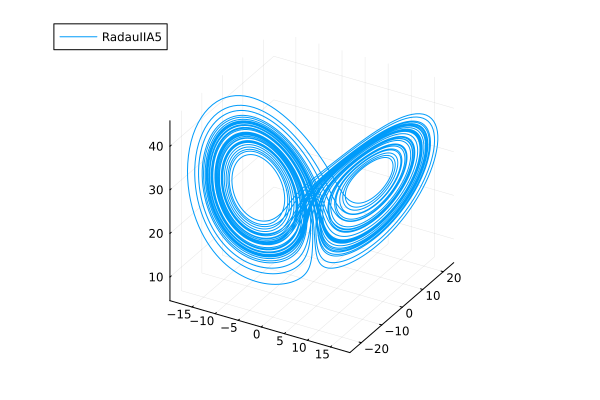

In [9]:
plot(solII,vars=(1,2,3),label="RadauIIA5")

In [23]:
# Runga-Kutta 4
Δt_RK = 0.1
tsteps_RK = Int(time/Δt_RK)
x̄=x̄₀
XRK = zeros(3,tsteps_RK)
for i=1:tsteps_RK
    x̄=RK4([θ,μ,β],x̄,Δt_RK)
    XRK[:,i] = x̄
end
print(x̄)

[-8.272673598074253, -0.43642769633358824, 34.25405752760986]

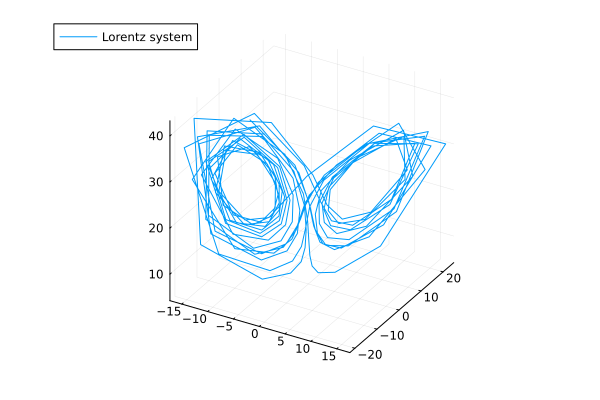

In [24]:
plot(XRK[1,:],XRK[2,:],XRK[3,:],label="Lorentz system")

In [20]:
# Euler
#Δt = 0.001
tsteps = Int(time/Δt)
x̄=x̄₀
Xeuler = zeros(3,tsteps)
for i=1:tsteps
    x̄=EulerForward([θ,μ,β],x̄,Δt)
    Xeuler[:,i] = x̄
end
print(x̄)

[-9.595246434145746, -4.823023024207817, 33.393926994897534]

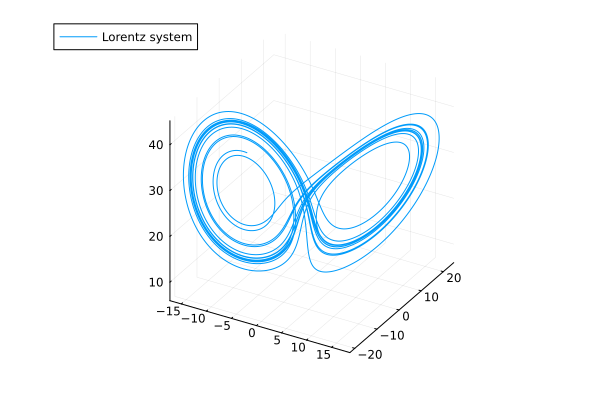

In [21]:
plot(Xeuler[1,:],Xeuler[2,:],Xeuler[3,:],label="Lorentz system")

In [ ]:
plot(XRK[1,:]-Xeuler[1,:],XRK[2,:]-Xeuler[2,:],XRK[3,:]-Xeuler[3,:],label="Lorentz system")

In [6]:
#DTM
Δt_DTM = 0.001
tsteps_DTM = Int(time/Δt_DTM)
x̄=x̄₀
terms=20
XDTM = zeros(3,tsteps_DTM)
for i=1:tsteps_DTM
    x̄=DTM([θ,μ,β],x̄, Δt_DTM, terms)
    XDTM[:,i] = x̄
end

In [8]:
plot(XDTM[1,:],XDTM[2,:],XDTM[3,:],label="Lorentz system")
savefig("sexy_lorentz.png")

"/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/sexy_lorentz.png"

In [10]:
#plot(range(0,stop=time-Δt_DTM,step=Δt_DTM),XDTM[1,:])
plot(range(0,stop=time-Δt_RK,step=Δt_RK),XRK[1,:])
plot!(solII,idxs=(1))
plot!(sol9,idxs=(1))
plot!(sol5,idxs=(1))
#plot!(sol12,idxs=(1))
#plot!(t,Xeuler[1,:])

UndefVarError: UndefVarError: Δt_RK not defined

In [ ]:
plot(range(0,stop=time-Δt_DTM,step=Δt_DTM),XDTM[2,:])
plot!(range(0,stop=time-Δt_RK,step=Δt_RK),XRK[2,:])
plot!(sol,idxs=(2))